# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
# 1) Criar faixas de latitude
sinasc['faixa_latitude'] = sinasc['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')

# 2) Agrupando os dados pela nova coluna 'faixa_latitude'
grouped = sinasc.groupby('faixa_latitude')

# 3) Realizando operações de agregação em duas variáveis numéricas
# Vou usar as colunas 'IDADEMAE' e 'APGAR1' como exemplo de variáveis numéricas não utilizadas anteriormente

estatisticas = grouped.agg(
    soma_idade_mae=('IDADEMAE', 'sum'),
    media_idade_mae=('IDADEMAE', 'mean'),
    min_idade_mae=('IDADEMAE', 'min'),
    max_idade_mae=('IDADEMAE', 'max'),
    mediana_idade_mae=('IDADEMAE', 'median'),
    desvio_padrao_idade_mae=('IDADEMAE', 'std'),
    variancia_idade_mae=('IDADEMAE', 'var'),
    
    soma_apgar1=('APGAR1', 'sum'),
    media_apgar1=('APGAR1', 'mean'),
    min_apgar1=('APGAR1', 'min'),
    max_apgar1=('APGAR1', 'max'),
    mediana_apgar1=('APGAR1', 'median'),
    desvio_padrao_apgar1=('APGAR1', 'std'),
    variancia_apgar1=('APGAR1', 'var')
)

# Exibir os resultados
print(estatisticas)

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
print(sinasc.columns)

In [ ]:
# 1) Criar faixas de área dos municípios
sinasc['faixa_area'] = sinasc['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

# 2) Agrupando os dados pela nova coluna 'faixa_area'
grouped = sinasc.groupby('faixa_area')

# 3) Realizando operações de agregação em duas variáveis numéricas não utilizadas anteriormente: QTDFILVIVO e PESO
estatisticas_area = grouped.agg(
    soma_filhos_vivos=('QTDFILVIVO', 'sum'),
    media_filhos_vivos=('QTDFILVIVO', 'mean'),
    min_filhos_vivos=('QTDFILVIVO', 'min'),
    max_filhos_vivos=('QTDFILVIVO', 'max'),
    mediana_filhos_vivos=('QTDFILVIVO', 'median'),
    desvio_padrao_filhos_vivos=('QTDFILVIVO', 'std'),
    variancia_filhos_vivos=('QTDFILVIVO', 'var'),
    
    soma_peso_bebe=('PESO', 'sum'),
    media_peso_bebe=('PESO', 'mean'),
    min_peso_bebe=('PESO', 'min'),
    max_peso_bebe=('PESO', 'max'),
    mediana_peso_bebe=('PESO', 'median'),
    desvio_padrao_peso_bebe=('PESO', 'std'),
    variancia_peso_bebe=('PESO', 'var')
)

# Exibir os resultados
print(estatisticas_area)


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
# 1) Criar faixas de altitude dos municípios
# Definindo três faixas como exemplo
sinasc['faixa_altitude'] = pd.cut(sinasc['munResAlt'], bins=[-np.inf, 100, 300, np.inf], labels=['Baixa', 'Média', 'Alta'])

# 2) Agrupando os dados pela nova coluna 'faixa_altitude'
grouped = sinasc.groupby('faixa_altitude')

# 3) Realizando operações de agregação em duas variáveis numéricas ainda não utilizadas: IDADEMAE e APGAR5
estatisticas_altitude = grouped.agg(
    soma_idade_mae=('IDADEMAE', 'sum'),
    media_idade_mae=('IDADEMAE', 'mean'),
    min_idade_mae=('IDADEMAE', 'min'),
    max_idade_mae=('IDADEMAE', 'max'),
    mediana_idade_mae=('IDADEMAE', 'median'),
    desvio_padrao_idade_mae=('IDADEMAE', 'std'),
    variancia_idade_mae=('IDADEMAE', 'var'),
    
    soma_apgar5=('APGAR5', 'sum'),
    media_apgar5=('APGAR5', 'mean'),
    min_apgar5=('APGAR5', 'min'),
    max_apgar5=('APGAR5', 'max'),
    mediana_apgar5=('APGAR5', 'median'),
    desvio_padrao_apgar5=('APGAR5', 'std'),
    variancia_apgar5=('APGAR5', 'var')
)

# Exibir os resultados
print(estatisticas_altitude)

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [ ]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

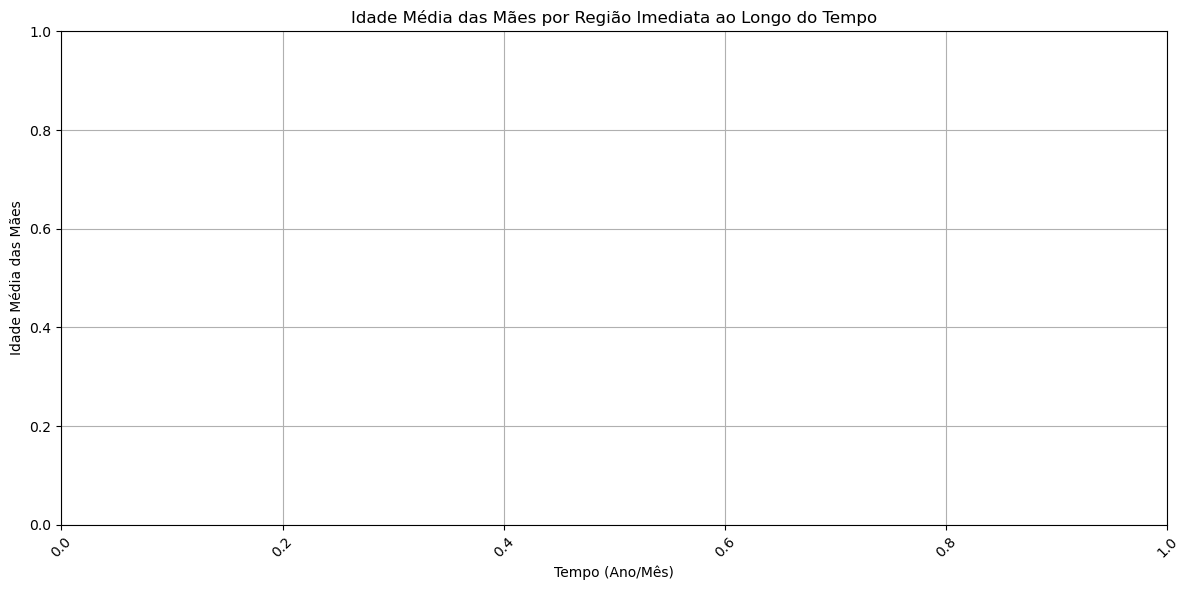

In [50]:
# 1) Criar uma coluna que associa os municípios às regiões imediatas
sinasc['regiao_imediata'] = sinasc['munResNome'].map(imediatas)

# 2) Convertendo a data de nascimento para formato datetime
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'], format='%d/%m/%Y')

# 3) Criar uma coluna para o ano/mês
sinasc['ano_mes'] = sinasc['DTNASC'].dt.to_period('M')

# 4) Agrupar por ano/mês e região imediata e calcular a idade média das mães
idade_media = sinasc.groupby(['ano_mes', 'regiao_imediata'])['IDADEMAE'].mean().unstack()

# 5) Preencher valores ausentes usando ffill corretamente
idade_media = idade_media.ffill()

# 6) Plotar o gráfico
plt.figure(figsize=(12, 6))

# Plotar a idade média de cada região ao longo do tempo
for regiao in idade_media.columns:
    plt.plot(idade_media.index.astype(str), idade_media[regiao], label=regiao)

# Verificação: Só adiciona legenda se houver dados
if idade_media.columns.any():
    plt.legend(title='Região Imediata')

plt.title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
plt.xlabel('Tempo (Ano/Mês)')
plt.ylabel('Idade Média das Mães')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [56]:
# Criar um DataFrame com os dados fornecidos
dados = {
    "Município": ["Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura",
                  "Cerejeiras", "Jaru", "Colorado do Oeste", "Ouro Preto do Oeste", "Espigão d'Oeste", 
                  "Santa Luzia d'Oeste", "Pimenteiras do Oeste", "Presidente Médici", "Castanheiras", 
                  "Guajará-Mirim", "Chupinguaia", "Cabixi", "Candeias do Jamari", "São Felipe d'Oeste", 
                  "Cacaulândia", "São Miguel do Guaporé", "Mirante da Serra", "Alvorada d'Oeste", 
                  "Teixeirópolis", "Nova Brasilândia d'Oeste", "Rio Crespo", "Primavera de Rondônia", 
                  "Alta Floresta d'Oeste", "Ministro Andreazza", "Novo Horizonte do Oeste", "Vale do Paraíso", 
                  "Alto Paraíso", "Parecis", "Buritis", "Itapuã do Oeste", "Corumbiara", "Cujubim", 
                  "Costa Marques", "São Francisco do Guaporé", "Urupá", "Monte Negro", "Seringueiras", 
                  "Governador Jorge Teixeira", "Machadinho d'Oeste", "Campo Novo de Rondônia", 
                  "Alto Alegre dos Parecis", "Theobroma", "Nova União", "Nova Mamoré", "Vale do Anari"],
    "IDH": [0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.685, 0.682, 0.672, 0.670, 
            0.665, 0.664, 0.658, 0.657, 0.652, 0.650, 0.649, 0.649, 0.646, 0.646, 0.643, 0.643, 
            0.643, 0.643, 0.643, 0.641, 0.641, 0.638, 0.634, 0.627, 0.625, 0.617, 0.616, 0.614, 
            0.613, 0.612, 0.611, 0.611, 0.609, 0.607, 0.598, 0.596, 0.596, 0.593, 0.592, 0.589, 
            0.587, 0.587, 0.584]
}

df_idh = pd.DataFrame(dados)

# Definir faixas de IDH
faixas = [0, 0.599, 0.699, 0.799, 0.899, 1.0]
rotulos = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
df_idh['faixa_idh'] = pd.cut(df_idh['IDH'], bins=faixas, labels=rotulos, right=False)

# Agrupar por faixas de IDH e contar o número de municípios
agrupado_idh = df_idh.groupby('faixa_idh', observed=False)['Município'].count().reset_index()

# Exibir os resultados
print(agrupado_idh)


     faixa_idh  Município
0  Muito Baixo          9
1        Baixo         36
2        Médio          7
3         Alto          0
4   Muito Alto          0


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [58]:
import pandas as pd

# Criar um DataFrame com os dados fornecidos
dados_ifdm = {
    "Município": ["Ariquemes", "Vilhena", "Pimenta Bueno", "Porto Velho", "Ji-Paraná", "Cacoal", 
                  "Santa Luzia d'Oeste", "Rolim de Moura", "Chupinguaia", "São Miguel do Guaporé", 
                  "Pimenteiras do Oeste", "Teixeirópolis", "Colorado do Oeste", "Jaru", 
                  "Rio Crespo", "Primavera de Rondônia", "Alta Floresta d'Oeste", 
                  "Ouro Preto do Oeste", "São Francisco do Guaporé", "Candeias do Jamari", 
                  "São Felipe d'Oeste", "Presidente Médici", "Cerejeiras", "Monte Negro", 
                  "Urupá", "Espigão d'Oeste", "Seringueiras", "Alvorada d'Oeste", "Itapuã do Oeste", 
                  "Cabixi", "Novo Horizonte do Oeste", "Nova Brasilândia d'Oeste", "Vale do Paraíso", 
                  "Corumbiara", "Alto Paraíso", "Cacaulândia", "Vale do Anari", 
                  "Ministro Andreazza", "Costa Marques", "Nova União", "Guajará-Mirim", 
                  "Mirante da Serra", "Parecis", "Castanheiras", "Theobroma", 
                  "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Cujubim", 
                  "Alto Alegre dos Parecis", "Governador Jorge Teixeira"],
    "IFDM": [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850, 0.6785, 0.6766, 
             0.6699, 0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337, 
             0.6261, 0.6214, 0.6199, 0.6153, 0.6140, 0.6137, 0.6016, 0.6006, 
             0.5973, 0.5922, 0.5919, 0.5903, 0.5887, 0.5858, 0.5857, 0.5818, 
             0.5759, 0.5735, 0.5721, 0.5710, 0.5657, 0.5626, 0.5571, 0.5541, 
             0.5519, 0.5502, 0.5430, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 
             0.5046, 0.4562]
}

df_ifdm = pd.DataFrame(dados_ifdm)

# Definir faixas de IFDM
faixas_ifdm = [0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
rotulos_ifdm = ['Muito Baixo', 'Baixo', 'Regular', 'Moderado', 'Alto', 'Muito Alto']
df_ifdm['faixa_ifdm'] = pd.cut(df_ifdm['IFDM'], bins=faixas_ifdm, labels=rotulos_ifdm, right=False)

# Agrupar por faixas de IFDM e contar o número de municípios
agrupado_ifdm = df_ifdm.groupby('faixa_ifdm', observed=False)['Município'].count().reset_index()

# Exibir os resultados
print(agrupado_ifdm)


    faixa_ifdm  Município
0  Muito Baixo          1
1        Baixo         25
2      Regular         19
3     Moderado          6
4         Alto          0
5   Muito Alto          0


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [60]:
import pandas as pd

# Criar um DataFrame com os dados fornecidos
dados_pib = {
    "Município": [
        "Porto Velho", "Ji-Paraná", "Vilhena", "Ariquemes", "Cacoal", "Jaru", "Rolim de Moura", "Pimenta Bueno",
        "Guajará-Mirim", "Ouro Preto do Oeste", "Buritis", "Machadinho do Oeste", "Espigão d'Oeste", 
        "São Miguel do Guaporé", "Candeias do Jamari", "Nova Mamoré", "Cerejeiras", "Alta Floresta do Oeste", 
        "Presidente Médici", "Cujubim", "Nova Brasilândia do Oeste", "Alto Paraíso", "São Francisco do Guaporé", 
        "Colorado do Oeste", "Monte Negro", "Alto Alegre dos Parecis", "Campo Novo de Rondônia", 
        "Alvorada do Oeste", "Chupinguaia", "Corumbiara", "Ministro Andreazza", "Urupá", "Costa Marques", 
        "Seringueiras", "Mirante da Serra", "Governador Jorge Teixeira", "Theobroma", "Santa Luzia do Oeste", 
        "Novo Horizonte do Oeste", "Itapuã do Oeste", "Vale do Paraíso", "Cacaulândia", "Cabixi", 
        "Vale do Anari", "Nova União", "Parecis", "Rio Crespo", "Pimenteiras do Oeste", "Teixeirópolis", 
        "São Felipe do Oeste", "Castanheiras", "Primavera de Rondônia"
    ],
    "PIB": [
        17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434, 1164877,
        893000, 834000, 726000, 633000, 625000, 616000, 548000, 529000, 507000, 
        496000, 428000, 385000, 360000, 358000, 353000, 335000, 219152, 213410, 
        208821, 204098, 190331, 188218, 174633, 172143, 171878, 169429, 163955, 
        148027, 140601, 135934, 129399, 129351, 116742, 116635, 113031, 105208, 
        92346, 80759, 76854, 76756, 72089, 72084, 59779, 52908
    ]
}

df_pib = pd.DataFrame(dados_pib)

# Definir faixas de PIB em bilhões
faixas_pib = [0, 100000000, 200000000, 300000000, 500000000, 1000000000, float('inf')]
rotulos_pib = ['Até 100 Milhões', 'Acima de 100 Milhões', 'Acima de 200 Milhões', 
               'Acima de 300 Milhões', 'Acima de 500 Milhões', 'Acima de 1 Bilhão']
df_pib['faixa_pib'] = pd.cut(df_pib['PIB'], bins=faixas_pib, labels=rotulos_pib, right=False)

# Agrupar por faixas de PIB e contar o número de municípios
agrupado_pib = df_pib.groupby('faixa_pib', observed=False)['Município'].count().reset_index()

# Exibir os resultados
print(agrupado_pib)


              faixa_pib  Município
0       Até 100 Milhões         52
1  Acima de 100 Milhões          0
2  Acima de 200 Milhões          0
3  Acima de 300 Milhões          0
4  Acima de 500 Milhões          0
5     Acima de 1 Bilhão          0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Analisando os dados do PIB de Rondônia, a gente vê que a maioria dos municípios com PIB acima de 1 bilhão está nas cidades mais populosas, tipo Porto Velho e Ji-Paraná. Isso mostra que crescimento econômico tá ligado à densidade populacional e à infraestrutura. Também, há uma galera com PIB entre 100 e 500 milhões, o que indica diversidade econômica e chances de crescimento em áreas menos desenvolvidas. Esses insights são importantes para orientar políticas públicas e investimentos.